In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My\ Drive/Colab\ Notebooks/Research \Models/Kameris \Models

/content/drive/My Drive/Colab Notebooks/Research Models


In [0]:
import numpy as np
import os
import sys
import pickle
from helpers import getStats, plotDict, genome2tabInt,plot_confusion_matrix, kmer_count, build_pipeline, plot_confusion_matrix 
from sklearn.preprocessing import normalize
from scipy.spatial import distance
import json 
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
from itertools import product
from itertools import product

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.preprocessing import StandardScaler



Using TensorFlow backend.


## Load training data 

-----------some stats: ------------
total num of classes:  4
total num of samples:  4064
max genome length:  11195
occurences: 
1        =>     1678
3        =>      832
4        =>      292
2        =>     1262
-----------------------------------


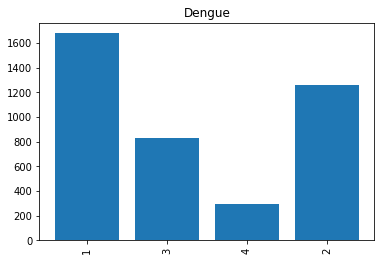

{'1': 1, '3': 2, '4': 3, '2': 4}


In [0]:
TrainDataFile = '../data/Dengue/train.p'

train = pickle.load(open(TrainDataFile, "rb"))
unique_labels = list(set(map(lambda x: x[0], train)))

#get some stats about training and testing dataset
diTrain = getStats(train)
plotDict(diTrain, 'train.png','Dengue')

# Create Labels for Classes
diLabels = {}
classId = 0;
numClasses = len(diTrain)

for item in diTrain:
    classId += 1
    diLabels[item] = classId;
    
print(diLabels)


-----------some stats: ------------
total num of classes:  4
total num of samples:  4064
max genome length:  11195
occurences: 
1        =>     1678
3        =>      832
4        =>      292
2        =>     1262
-----------------------------------


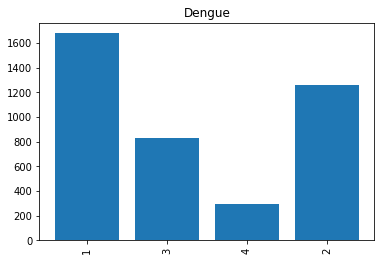

{'1': 1678, '3': 832, '4': 292, '2': 1262}


In [0]:
## Let's delete all the missrepresented classes. 

# Select the minimun amount of elements per class
minimum = 20

# Create Labels for Classes
diLabels = {}
classId = 0;
numClasses = len(diTrain)

i=0
while i < len(train):
    if diTrain[train[i][0]] < minimum: 
      train.pop(i)
    else: 
        i+=1

#get some stats about the training dataset
diTrain = getStats(train)
plotDict(diTrain, 'train.png','Dengue')
print(diTrain)


In [0]:
n_train = len(train)
k = 5
train_features = []
train_labels = []
a_size = int(np.sqrt(4**k))

unique_labels = list(set(map(lambda x: x[0], train)))
numClasses = len(unique_labels)

for i in range(len(train)):

    t = kmer_count(train[i][1],k)
    train_features.append(t)
    train_labels.append(train[i][0])
    
x_train = np.asarray(train_features).astype('float32')
y_train = np.asarray(train_labels)



-----------some stats: ------------
total num of classes:  4
total num of samples:  1015
max genome length:  11195
occurences: 
1        =>      424
3        =>      197
4        =>       75
2        =>      319
-----------------------------------


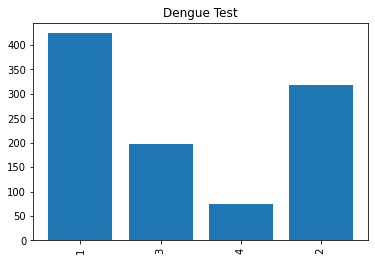

In [0]:
TestDataFile = '../data/Dengue/test.p'
test = pickle.load(open(TestDataFile, "rb"))

#get some stats about training and testing dataset
diTrain = getStats(test)
plotDict(diTrain, 'test.png','Dengue Test')

test_features = []
test_labels = []

for i in range(len(test)):

    t = kmer_count(test[i][1],k)
    test_features.append(t)
    test_labels.append(test[i][0])
    
x_test = np.asarray(test_features).astype('float32')
y_test = np.asarray(test_labels)



In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn import svm

# This is the machine Learning Pipeline, taken from Kameris
#-----------------------------------------------
def build_pipeline(num_features):

    normalize_features = True
    dim_reduce_fraction = 0.1

    # setup normalizers if needed
    normalizers = []

    normalizers.append(('scaler', StandardScaler(with_mean=False)))

    # reduce dimensionality to some fraction of its original
    # normalizers.append(('dim_reducer',TruncatedSVD(n_components=int(
    #                     np.ceil(num_features * dim_reduce_fraction)))))

    # Classifier
    normalizers.append(('classifier',svm.SVC(kernel='linear')))

    return Pipeline(normalizers)

In [0]:
# Build, train and test the classifier.
print(x_train.shape,y_train.shape)
pipeline = build_pipeline(1024)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

(4064, 1024) (4064,)


In [0]:
print(y_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))

['3' '2' '1' ... '2' '2' '1']
['3' '2' '1' ... '2' '2' '1']
1.0
